In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import phenograph
import copy
from scipy import sparse
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
#%matplotlib inline
import anndata as ad 
import pathlib
import warnings
import squidpy as sq

warnings.simplefilter(action='ignore', category=FutureWarning)\

sc.set_figure_params(facecolor="white", figsize=(8, 8))

In [4]:
adata_spatial = ad.read_h5ad('adata_spatial.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 360673 × 33
    obs: 'sample', 'roi', 'obj_id', 'X_centroid', 'Y_centroid', 'area', 'perimeter', 'minor_axis_length', 'major_axis_length', 'eccentricity', 'solidity', 'n_protein_by_counts', 'total_counts', 'cell_count', 'mob_id', 'pre_post', 'mob', 'cell_id', 'leiden', 'cluster_1', 'cluster_1_name', 'cluster_2', 'alt_name', 'last_name', 'last_name_simple'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'markers', 'channel', 'total_signal', 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'alt_name_colors', 'cluster_1_colors', 'cluster_2_colors', 'hvg', 'last_name_simple_co_occurrence', 'last_name_simple_colors', 'last_name_simple_nhood_enrichment', 'last_name_simple_ripley_F', 'leiden', 'leiden_colors', 'log1p', 'moved_genes', 'neighbors', 'pca', 'rank_genes_groups', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers

In [4]:
adata_spatial= adata 

In [6]:
adata.uns['spatial'] = adata.obsm['spatial']

In [7]:
adata_spatial.obsp["spatial_distances"]
adata_spatial.obsp["spatial_connectivities"]
adata.uns['spatial']

array([[ 71.23684211,   7.79824561],
       [ 51.45454545,   8.20779221],
       [182.31555556,   9.71555556],
       ...,
       [515.28333333, 593.48333333],
       [552.54054054, 593.48648649],
       [572.76521739, 592.15652174]])

<function matplotlib.pyplot.show(close=None, block=None)>

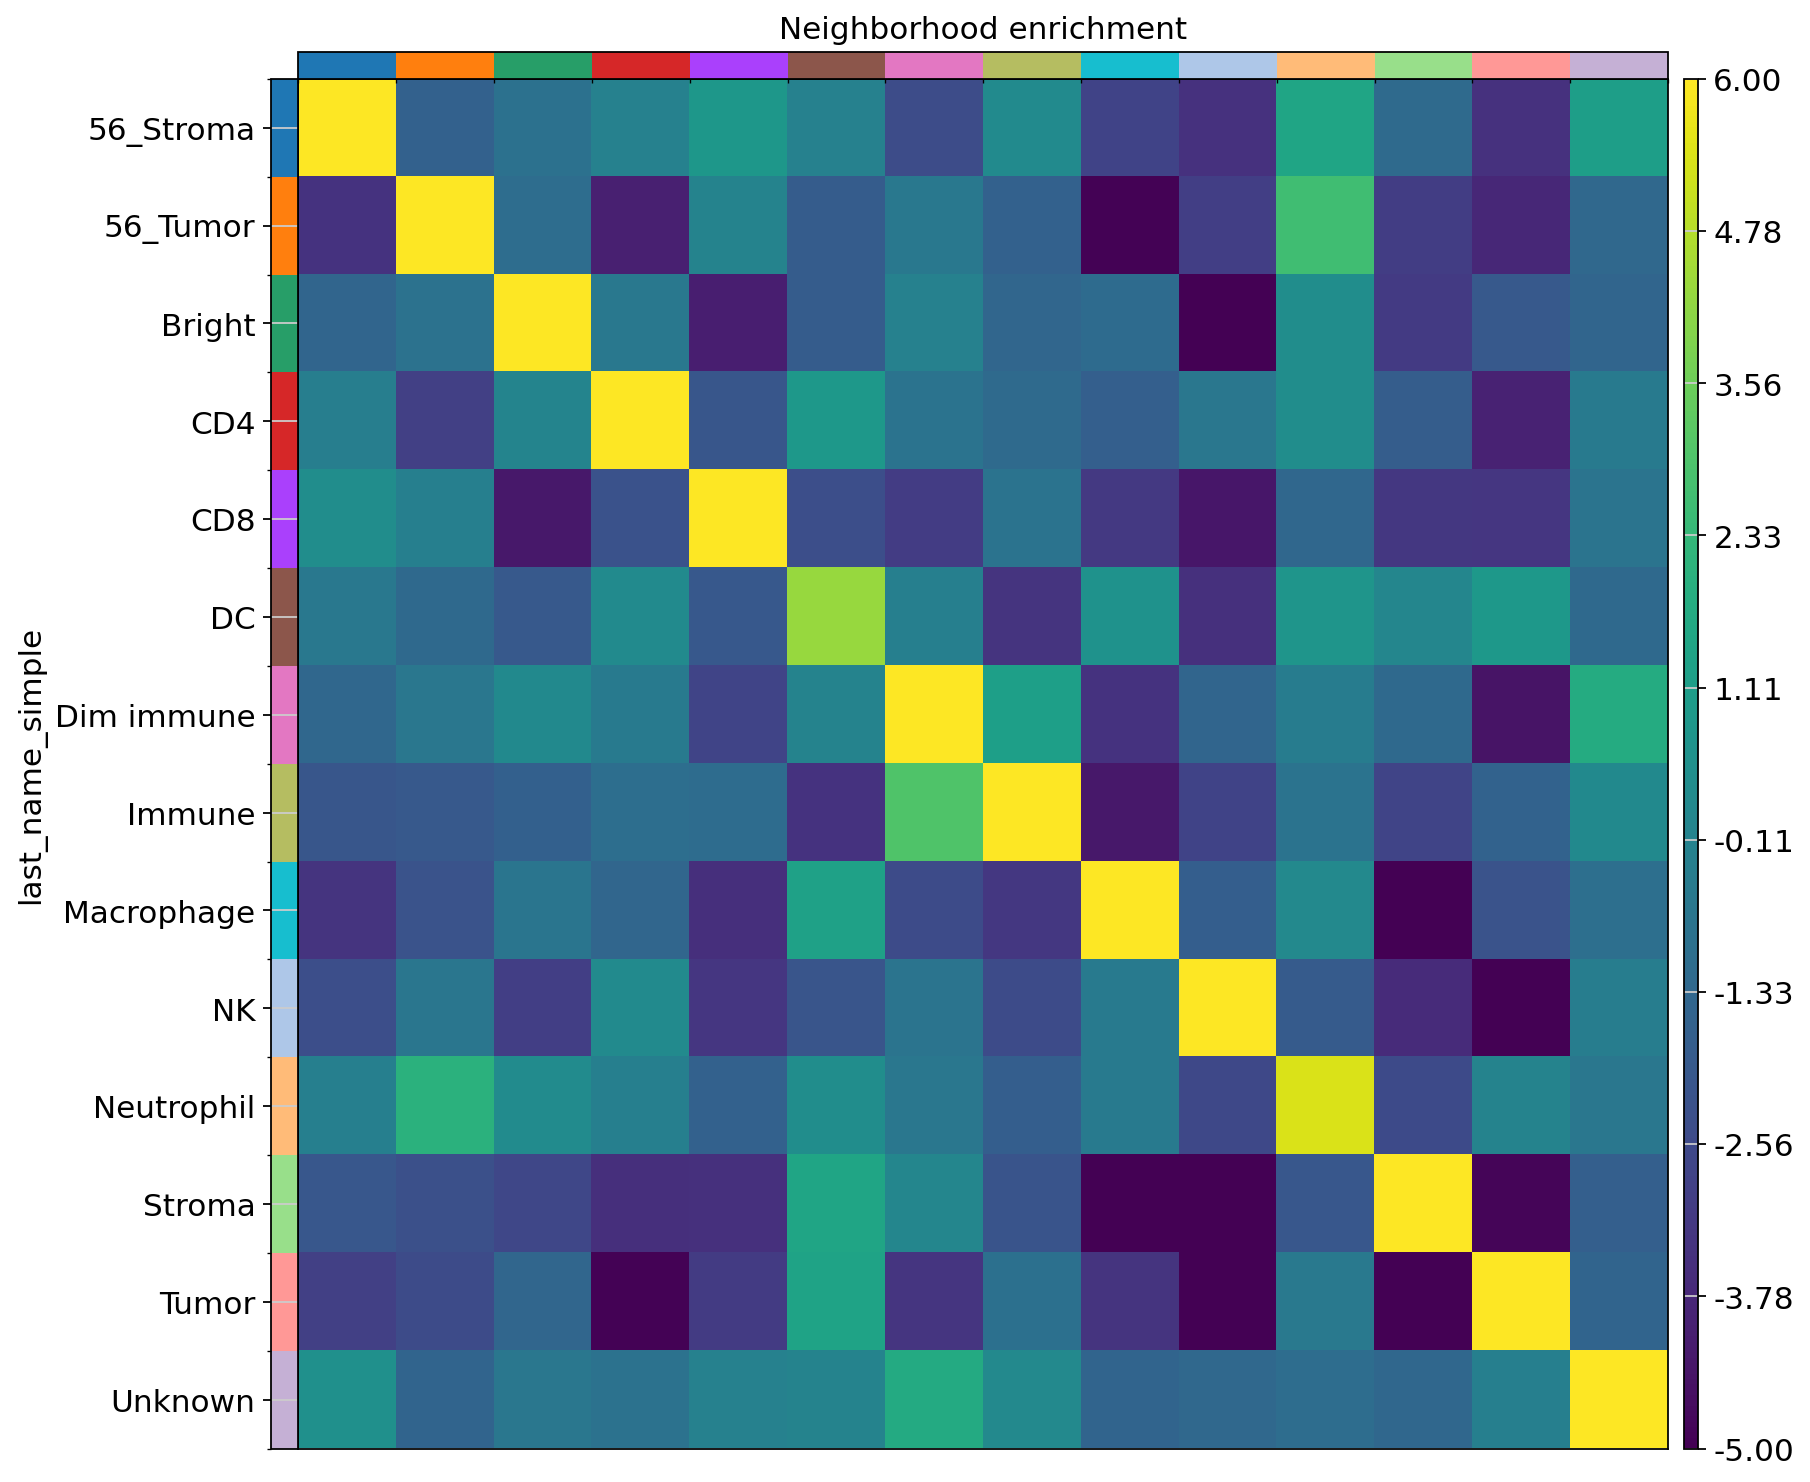

In [8]:
sq.pl.nhood_enrichment(adata_spatial, cluster_key="last_name_simple", vmin=-5, vmax=6)
plt.show
#plt.savefig("neighborhood_enrichment.pdf", bbox_inches='tight')  # 'tight' ensures that the entire figure is saved without clipping



In [9]:
adata_spatial

AnnData object with n_obs × n_vars = 360673 × 33
    obs: 'sample', 'roi', 'obj_id', 'X_centroid', 'Y_centroid', 'area', 'perimeter', 'minor_axis_length', 'major_axis_length', 'eccentricity', 'solidity', 'n_protein_by_counts', 'total_counts', 'cell_count', 'mob_id', 'pre_post', 'mob', 'cell_id', 'leiden', 'cluster_1', 'cluster_1_name', 'cluster_2', 'alt_name', 'last_name', 'last_name_simple'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'markers', 'channel', 'total_signal', 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'alt_name_colors', 'cluster_1_colors', 'cluster_2_colors', 'hvg', 'last_name_simple_co_occurrence', 'last_name_simple_colors', 'last_name_simple_nhood_enrichment', 'last_name_simple_ripley_F', 'leiden', 'leiden_colors', 'log1p', 'moved_genes', 'neighbors', 'pca', 'rank_genes_groups', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers

100%|██████████| 1000/1000 [00:14<00:00, 67.64/s]


<function matplotlib.pyplot.show(close=None, block=None)>

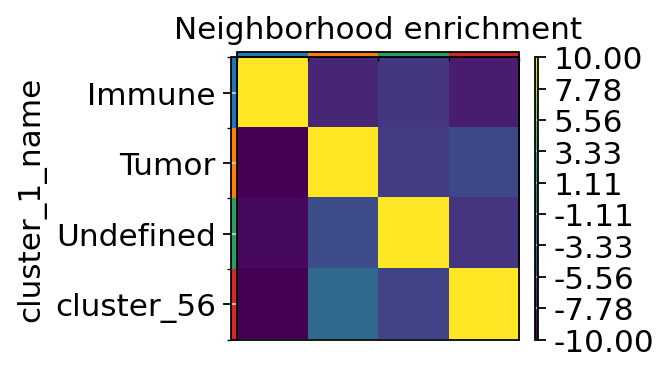

In [12]:

sq.gr.nhood_enrichment(
    adata_spatial,
    cluster_key="cluster_1_name",
)
sq.pl.nhood_enrichment(adata_spatial, cluster_key="cluster_1_name", vmin=-10, vmax=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

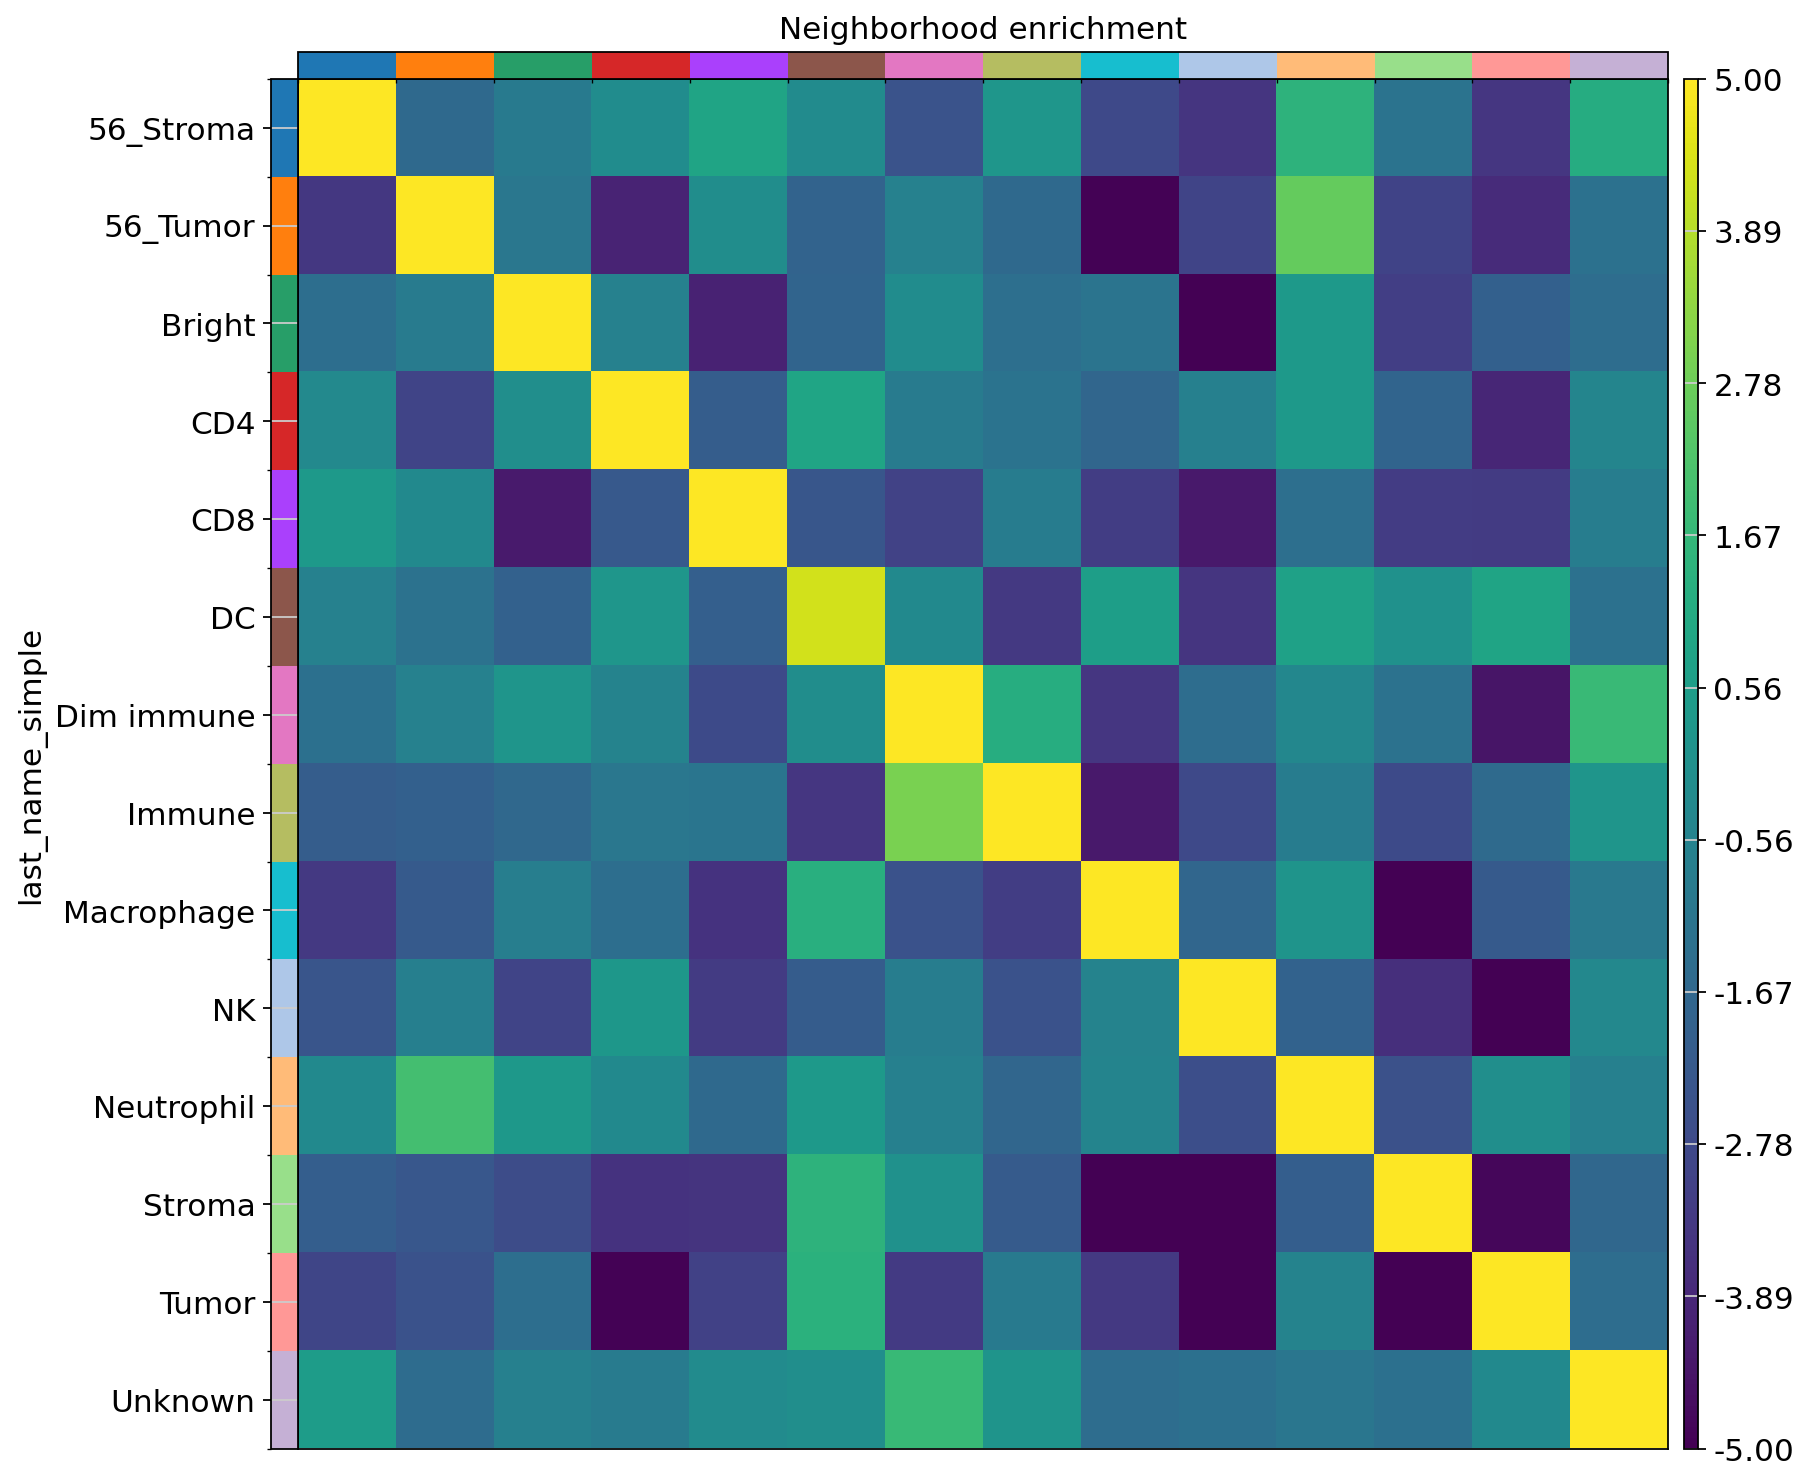

In [14]:
sq.pl.nhood_enrichment(adata_spatial, cluster_key="last_name_simple", vmin=-5, vmax=5)
plt.show

In [6]:
#sq.gr.co_occurrence(adata_spatial, cluster_key="last_name_simple")


100%|██████████| 15753/15753 [54:58<00:00,  4.78/s]


In [7]:
adata_spatial.write('adata_spatial.h5ad')

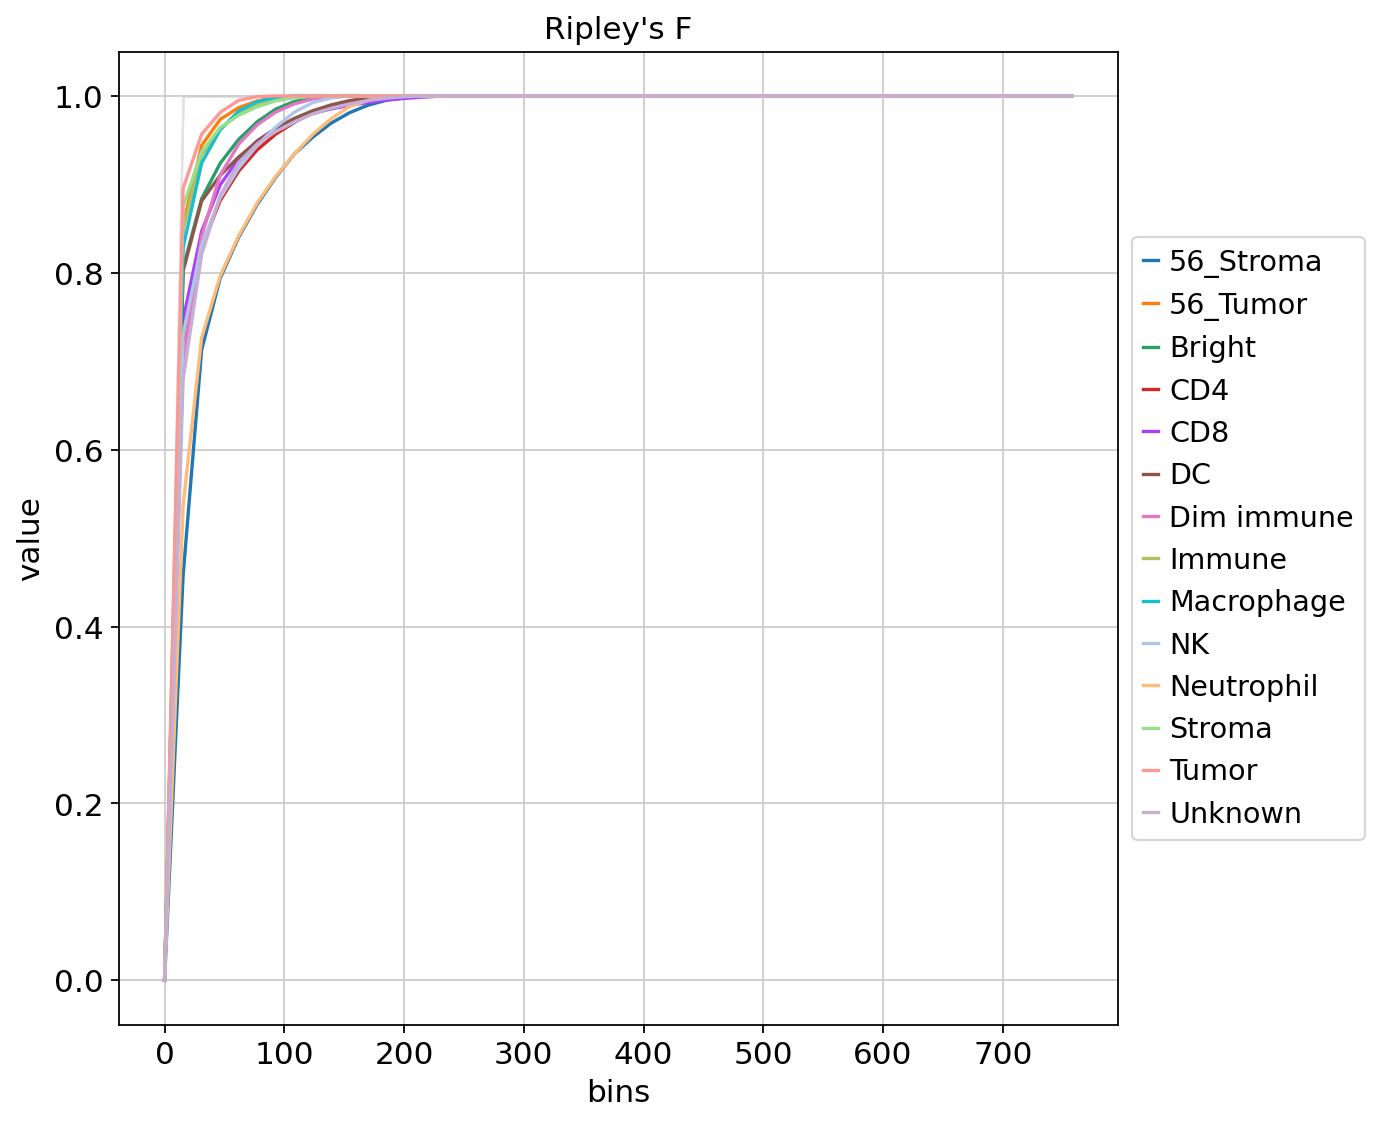

In [29]:
sq.pl.ripley(adata_spatial, 
                  cluster_key="last_name_simple", 
                  mode='F', 
            plot_sims=True, 
                  palette=None, figsize=None, 
                  dpi=None, save=None, ax=None)

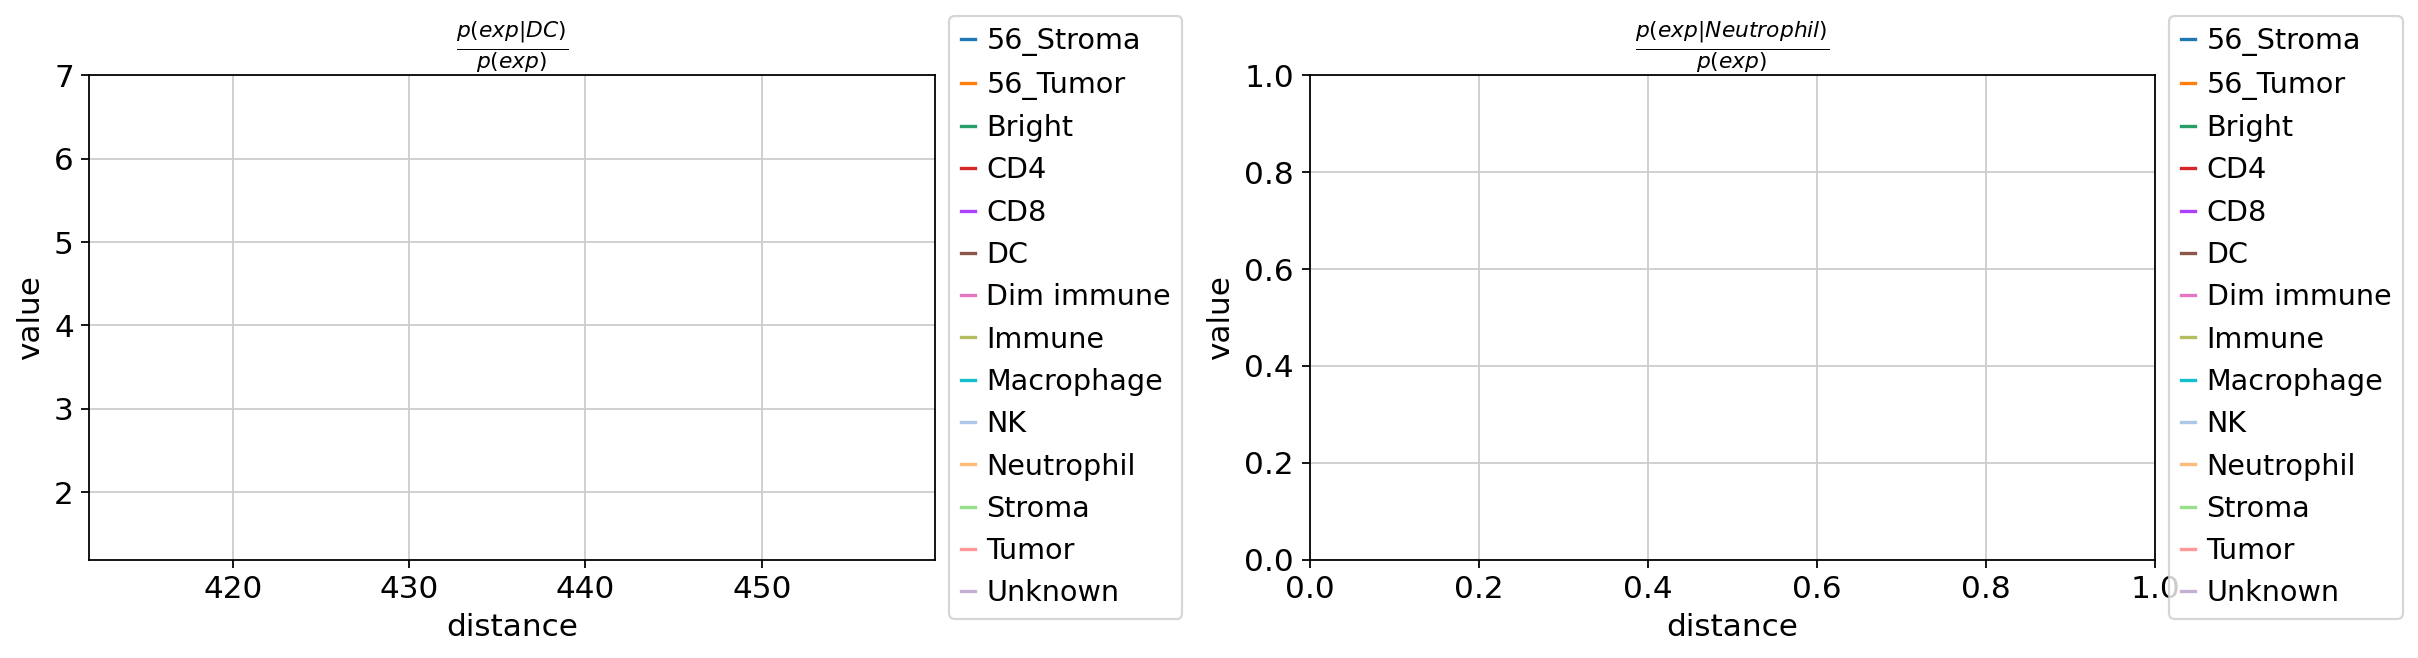

In [25]:
sq.pl.co_occurrence(
    adata_spatial,
    cluster_key="last_name_simple",
        clusters=["Neutrophil", "DC"],
    figsize=(15, 4),
)

In [27]:
adata_spatial.obs

,sample,roi,obj_id,X_centroid,Y_centroid,area,perimeter,minor_axis_length,major_axis_length,eccentricity,...,pre_post,mob,cell_id,leiden,cluster_1,cluster_1_name,cluster_2,alt_name,last_name,last_name_simple
230807_BCG01_Area3-01-0003,230807_BCG01_Area3,230807_BCG01_Area3-01,3,7.798246,71.236842,114.0,39.142136,10.735118,13.723384,0.622965,...,pre,1371,cell_0,1,Undefined_1,Undefined,56_4,56_4,56_4,56_Stroma
230807_BCG01_Area3-01-0004,230807_BCG01_Area3,230807_BCG01_Area3-01,4,8.207792,51.454545,77.0,31.313708,8.136043,12.088005,0.739581,...,pre,1371,cell_1,2,Tumor_1,Tumor,Tumor_1,NaN,Tumor_1,Tumor
230807_BCG01_Area3-01-0005,230807_BCG01_Area3,230807_BCG01_Area3-01,5,9.715556,182.315556,225.0,57.112698,14.157603,20.908666,0.735876,...,pre,1371,cell_2,3,Tumor_2,Tumor,CD68_EPCAM,NaN,CD68_EPCAM,Macrophage
230807_BCG01_Area3-01-0006,230807_BCG01_Area3,230807_BCG01_Area3-01,6,11.088235,61.696078,102.0,37.384776,9.734949,13.614470,0.699079,...,pre,1371,cell_3,5,Undefined_2,Undefined,Immune_2,Bright_1,Bright_1,Bright
230807_BCG01_Area3-01-0007,230807_BCG01_Area3,230807_BCG01_Area3-01,7,13.978723,129.063830,47.0,23.071068,7.488948,8.022086,0.358470,...,pre,1371,cell_4,6,56_2,cluster_56,Undefined_1,Stroma_5,Stroma_5,Stroma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BCG02_230627-03-1214,BCG02_230627,BCG02_230627-03,1214,590.393939,426.257576,66.0,27.556349,8.102249,10.346567,0.621914,...,pre,2138,cell_360668,0,56_1,cluster_56,XCR1,Stroma_11,Stroma_11,Stroma
BCG02_230627-03-1215,BCG02_230627,BCG02_230627-03,1215,591.756410,491.487179,78.0,30.142136,9.598018,10.335545,0.370978,...,pre,2138,cell_360669,6,56_2,cluster_56,CD4_Tcell_1,Stroma_2,Stroma_2,Stroma
BCG02_230627-03-1217,BCG02_230627,BCG02_230627-03,1217,593.483333,515.283333,60.0,26.727922,7.589057,10.055711,0.656069,...,pre,2138,cell_360670,8,Macrophage_1,Immune,Macrophage_1,NaN,Macrophage_1,Macrophage
BCG02_230627-03-1218,BCG02_230627,BCG02_230627-03,1218,593.486486,552.540541,37.0,20.485281,5.884725,8.009470,0.678369,...,pre,2138,cell_360671,0,56_1,cluster_56,Macrophage_1,Stroma_12,Stroma_12,Stroma


In [30]:
cell_size =pd.DataFrame(adata_spatial.obs[['leiden','sample','roi','area','major_axis_length']])



In [31]:
cell_size

,leiden,sample,roi,area,major_axis_length
230807_BCG01_Area3-01-0003,1,230807_BCG01_Area3,230807_BCG01_Area3-01,114.0,13.723384
230807_BCG01_Area3-01-0004,2,230807_BCG01_Area3,230807_BCG01_Area3-01,77.0,12.088005
230807_BCG01_Area3-01-0005,3,230807_BCG01_Area3,230807_BCG01_Area3-01,225.0,20.908666
230807_BCG01_Area3-01-0006,5,230807_BCG01_Area3,230807_BCG01_Area3-01,102.0,13.614470
230807_BCG01_Area3-01-0007,6,230807_BCG01_Area3,230807_BCG01_Area3-01,47.0,8.022086
...,...,...,...,...,...
BCG02_230627-03-1214,0,BCG02_230627,BCG02_230627-03,66.0,10.346567
BCG02_230627-03-1215,6,BCG02_230627,BCG02_230627-03,78.0,10.335545
BCG02_230627-03-1217,8,BCG02_230627,BCG02_230627-03,60.0,10.055711
BCG02_230627-03-1218,0,BCG02_230627,BCG02_230627-03,37.0,8.009470


In [32]:
cell_size['major_axis_length'].mean()

14.36328668504164

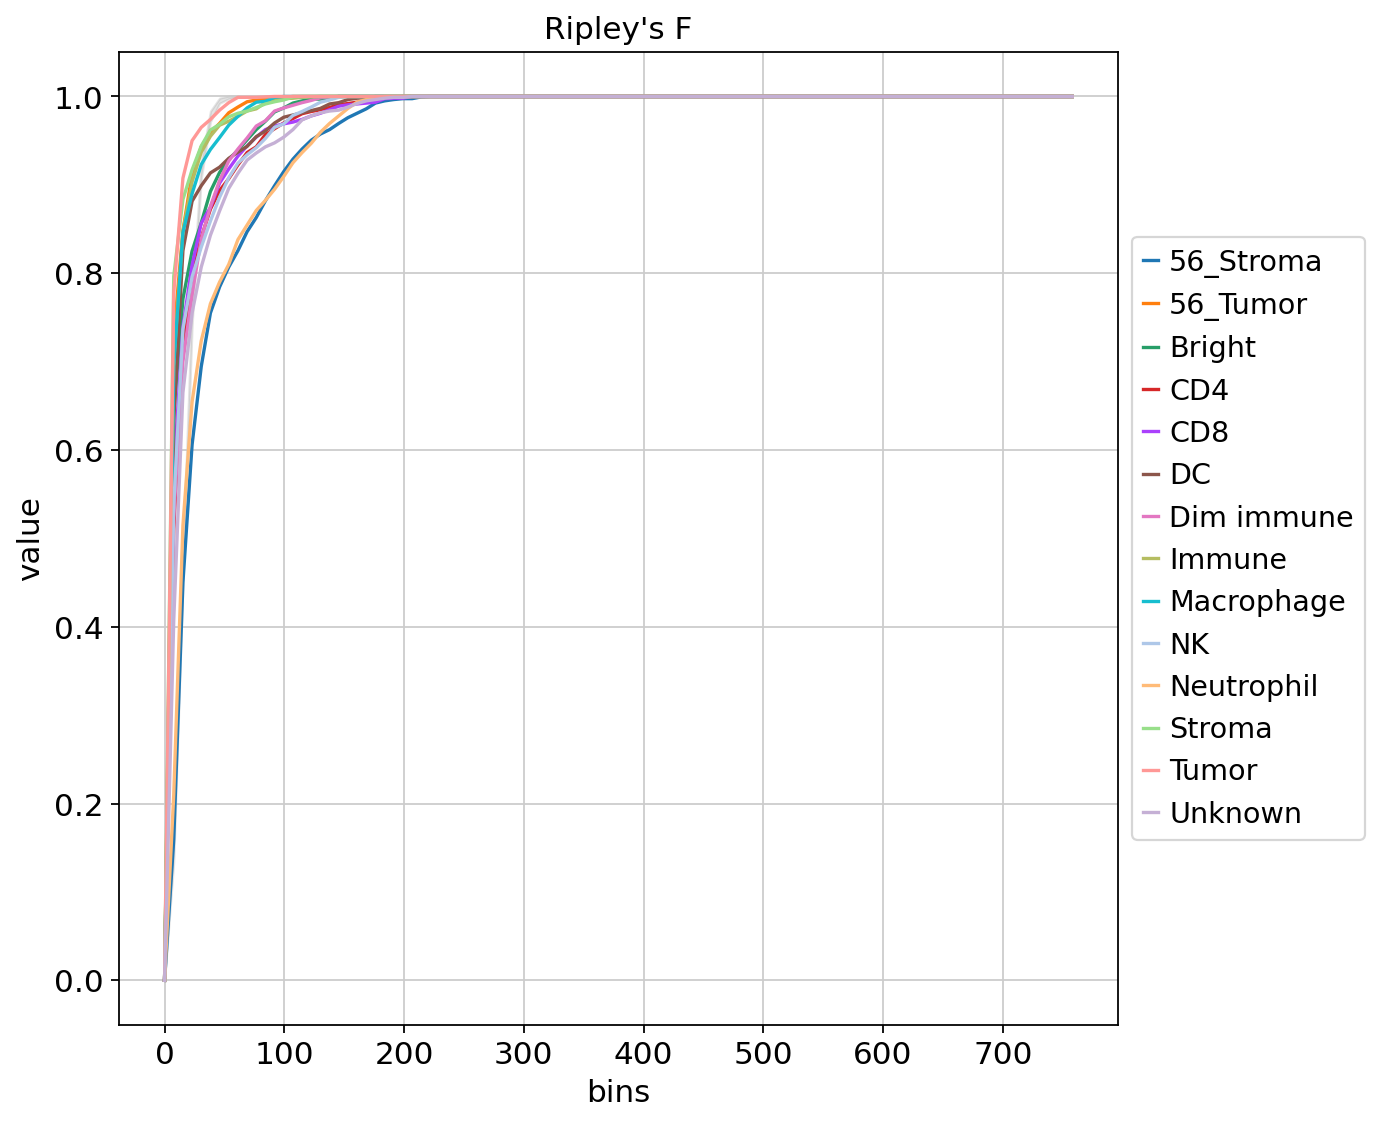

In [35]:

sq.gr.ripley(adata_spatial, 
             cluster_key="last_name_simple", 
             mode='F', spatial_key='spatial', 
             metric='euclidean', n_neigh=2, 
             n_simulations=100, n_observations=1000, 
             max_dist=200, n_steps=100, seed=None, copy=False)




<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x640 with 0 Axes>

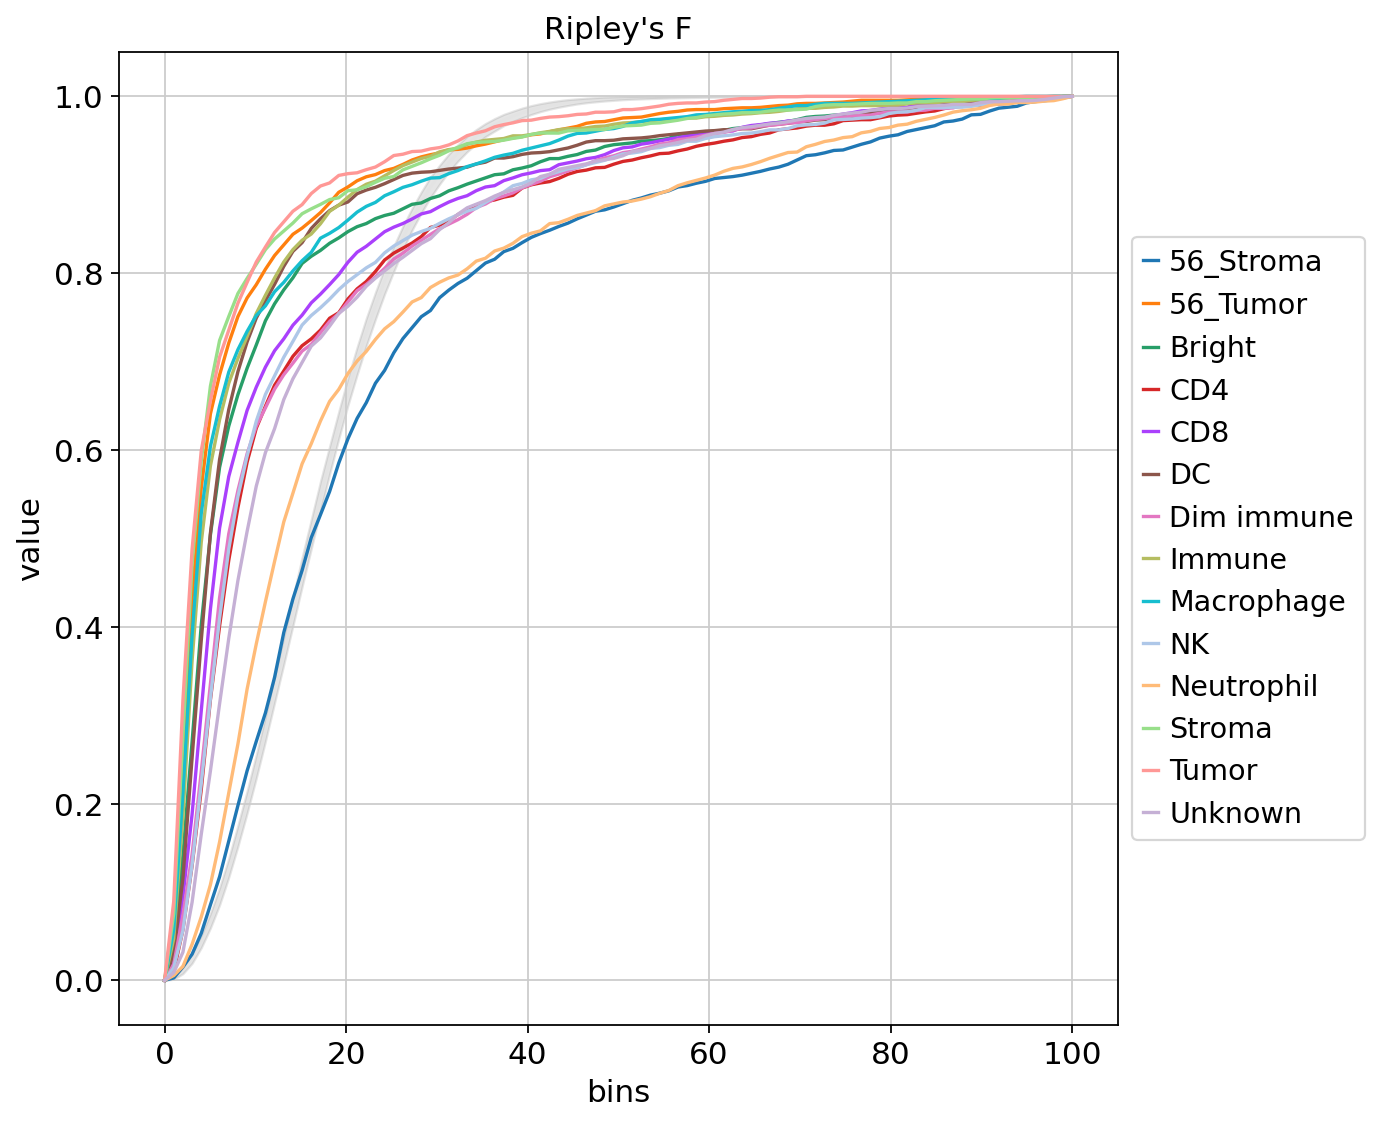

In [6]:
sq.gr.ripley(adata_spatial, 
             cluster_key="last_name_simple", 
             mode='F', spatial_key='spatial', 
             metric='euclidean', n_neigh=2, 
             n_simulations=300, n_observations=1000, 
             max_dist=100, n_steps=100, seed=None, copy=False)


plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

sq.pl.ripley(adata_spatial, 
                  cluster_key="last_name_simple", 
                  mode='F', 
            plot_sims=True, 
                  palette=None, figsize=None, 
                  dpi=None, save=None, ax=None)
plt.savefig("ripley_plot.png", bbox_inches='tight')  # 'tight' ensures that the entire figure is saved without clipping

plt.show

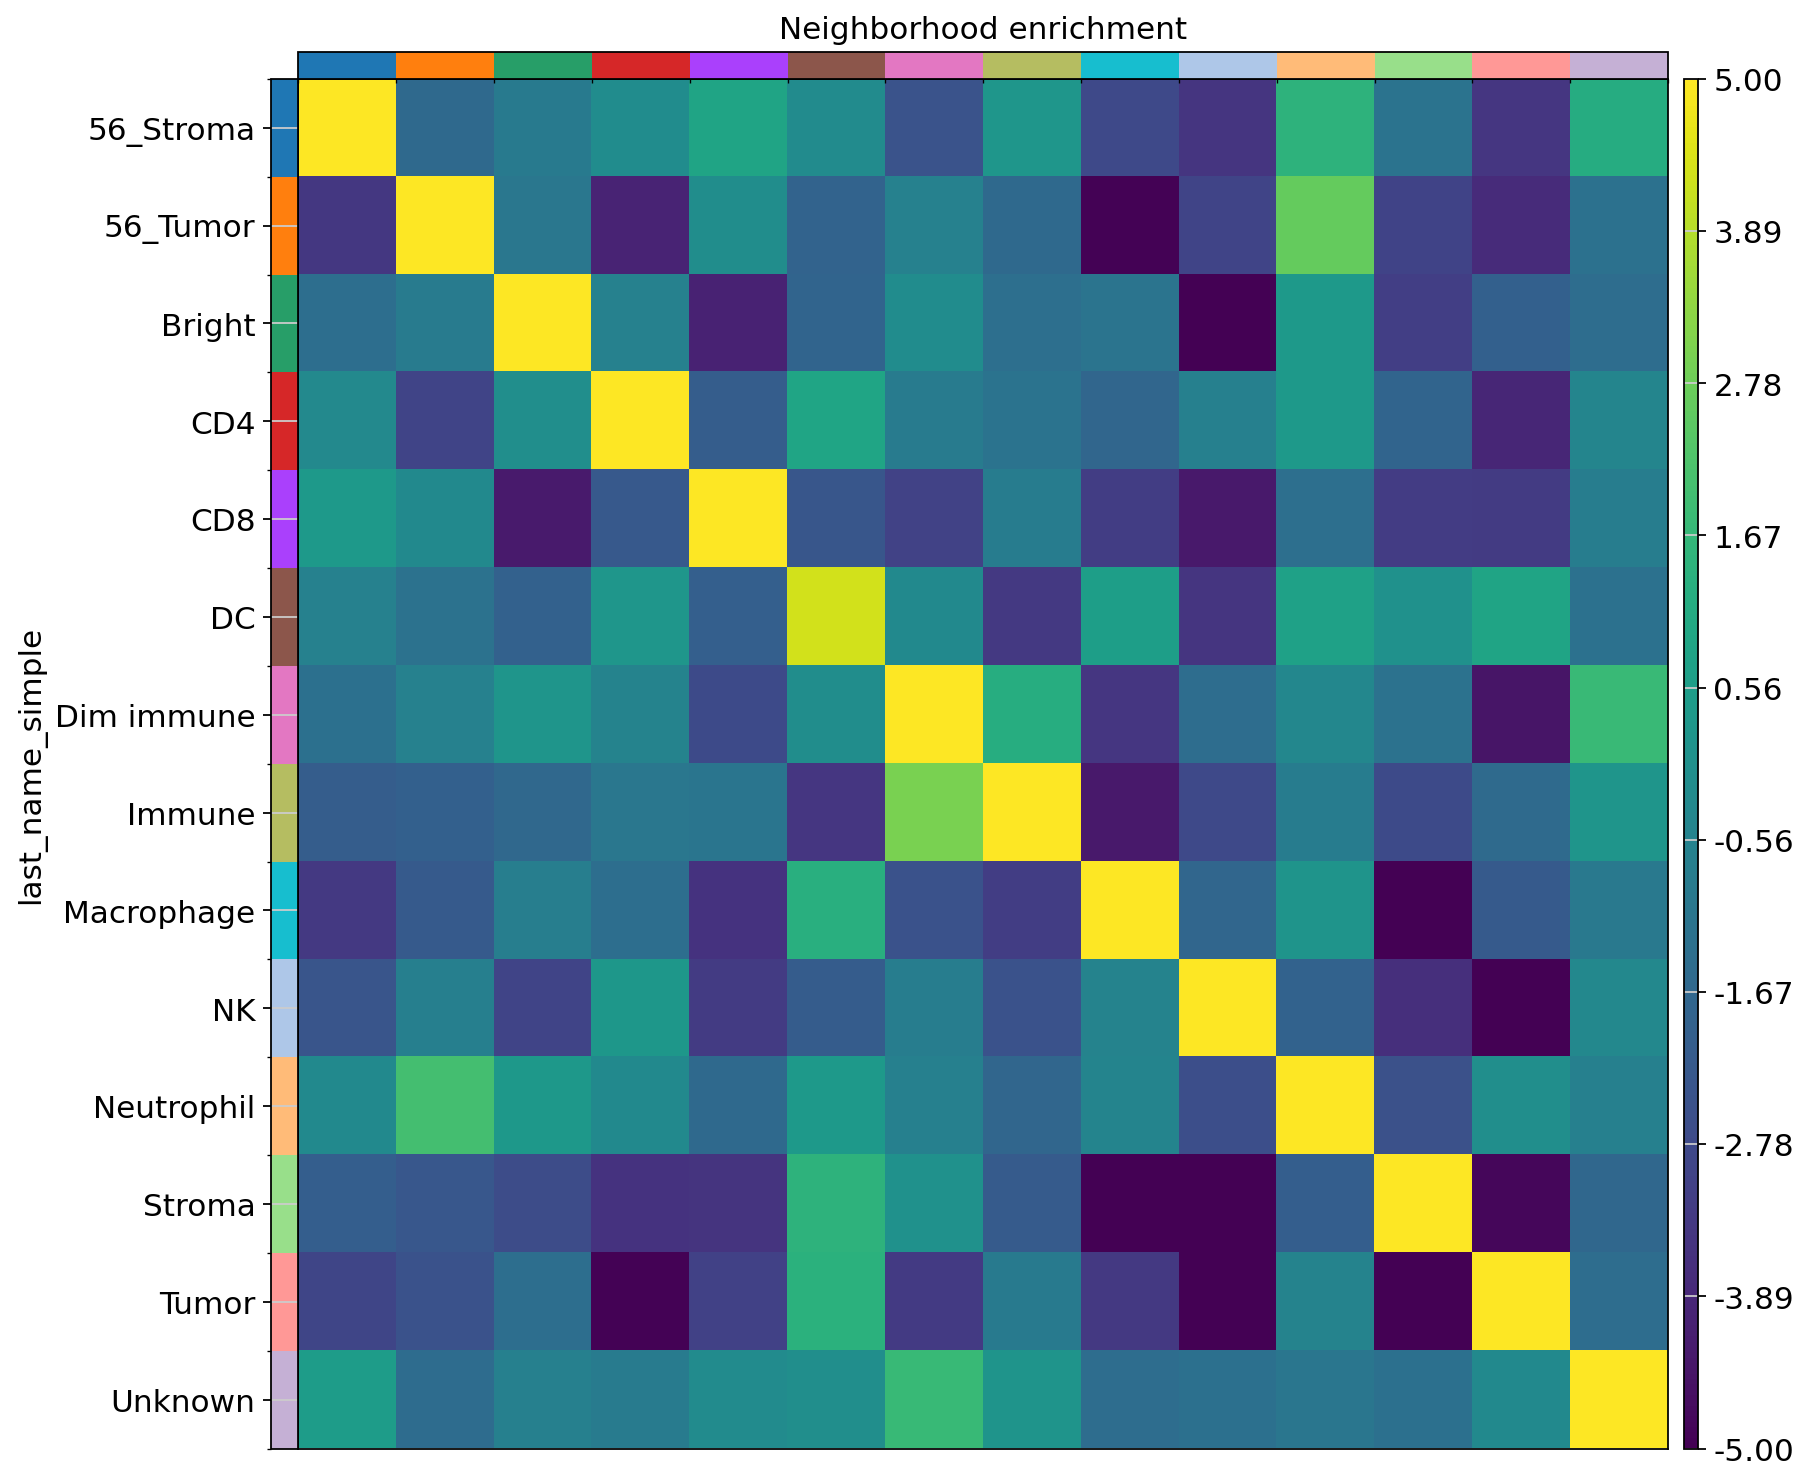

In [5]:
nhood_enrichment = adata_spatial.uns['last_name_simple_nhood_enrichment']
#nhood_enrichment

In [6]:
zscore_array = nhood_enrichment['zscore']
zscore_df = pd.DataFrame(zscore_array)
zscore_df.columns  = adata_spatial.obs['last_name_simple'].unique()
zscore_df.index  = adata_spatial.obs['last_name_simple'].unique()

zscore_df

,56_Stroma,Tumor,Macrophage,Bright,Stroma,56_Tumor,CD4,Immune,Dim immune,Unknown,DC,NK,CD8,Neutrophil
56_Stroma,52.091597,-1.572636,-0.910435,-0.152631,0.828145,-0.182852,-2.438871,0.252448,-2.783664,-3.445239,1.467357,-1.203303,-3.416931,1.185517
Tumor,-3.380395,9.838934,-1.049824,-4.014398,-0.085420,-1.798089,-0.612228,-1.565159,-4.944156,-2.956376,2.618793,-3.003152,-3.767484,-1.282668
Macrophage,-1.396745,-0.842963,14.163970,-0.604890,-4.056807,-1.784374,-0.155400,-1.366857,-1.135251,-5.516041,0.402897,-3.131522,-1.921770,-1.408568
Bright,-0.311518,-2.933341,-0.043502,26.293248,-2.057904,0.859993,-0.830256,-1.178217,-1.680758,-0.639357,0.381329,-1.770606,-3.937523,-0.452275
Stroma,0.378509,-0.241515,-4.282793,-2.223179,24.213605,-2.341428,-3.030142,-0.803266,-3.179680,-4.313856,-1.339181,-3.228276,-3.262339,-0.753462
56_Tumor,-0.614409,-1.243502,-1.911572,0.243887,-1.975756,4.320345,-0.251668,-3.342309,0.619956,-3.453679,0.721592,0.059564,0.851931,-1.252124
CD4,-1.319168,-0.623432,0.228285,-0.523899,-2.761332,-0.095656,9.833292,1.213645,-3.401924,-1.409824,-0.379563,-1.228889,-4.430751,1.774699
Immune,-2.050726,-1.944513,-1.620039,-1.046086,-1.126394,-3.399484,2.969625,11.257741,-4.307209,-2.794630,-0.816305,-2.761853,-1.556566,0.220336
Dim immune,-3.338987,-2.187153,-0.730324,-1.375852,-3.538258,1.297615,-2.495924,-3.203036,21.682639,-1.692259,0.173628,-6.044061,-2.172557,-0.973203
Unknown,-2.365234,-0.695772,-2.946392,0.276685,-3.271693,-2.082685,-0.777837,-2.481504,-0.520788,49.142598,-1.840330,-3.663801,-5.768207,-0.350599


In [7]:
 # Compute the correlation matrix
corr = zscore_df.corr()

    # Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

In [8]:
corr

,56_Stroma,Tumor,Macrophage,Bright,Stroma,56_Tumor,CD4,Immune,Dim immune,Unknown,DC,NK,CD8,Neutrophil
56_Stroma,1.000000,-0.120695,-0.042490,0.005683,0.079909,0.001368,-0.199933,0.052844,-0.108239,-0.095405,0.186413,0.005029,-0.126968,0.098415
Tumor,-0.120695,1.000000,-0.006329,-0.270820,0.098822,-0.295232,-0.001920,-0.133327,-0.198937,-0.012758,0.540049,-0.150021,-0.185161,-0.123437
Macrophage,-0.042490,-0.006329,1.000000,0.056072,-0.325943,-0.149643,0.100554,-0.056542,0.041710,-0.201033,0.197788,-0.158213,-0.002730,-0.059418
Bright,0.005683,-0.270820,0.056072,1.000000,-0.098772,0.137085,-0.007536,-0.045689,0.010524,0.054548,0.052853,-0.071459,-0.239300,-0.015967
Stroma,0.079909,0.098822,-0.325943,-0.098772,1.000000,-0.339481,-0.261946,0.032571,-0.159960,-0.136731,-0.147916,-0.123910,-0.124274,0.003593
56_Tumor,0.001368,-0.295232,-0.149643,0.137085,-0.339481,1.000000,-0.119749,-0.547995,0.272632,-0.274516,0.128927,0.276745,0.330216,-0.057065
CD4,-0.199933,-0.001920,0.100554,-0.007536,-0.261946,-0.119749,1.000000,0.415753,-0.242240,-0.019779,-0.125041,0.130087,-0.294594,0.302959
Immune,0.052844,-0.133327,-0.056542,-0.045689,0.032571,-0.547995,0.415753,1.000000,-0.307089,-0.147426,-0.163271,-0.102297,-0.005718,0.163790
Dim immune,-0.108239,-0.198937,0.041710,0.010524,-0.159960,0.272632,-0.242240,-0.307089,1.000000,0.052753,0.072389,-0.362602,-0.023182,-0.056903
Unknown,-0.095405,-0.012758,-0.201033,0.054548,-0.136731,-0.274516,-0.019779,-0.147426,0.052753,1.000000,-0.275507,-0.162134,-0.285800,-0.005011


In [47]:
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

In [15]:
#plot_correlation_circle_heatmap_test(zscore_df)


<Axes: >

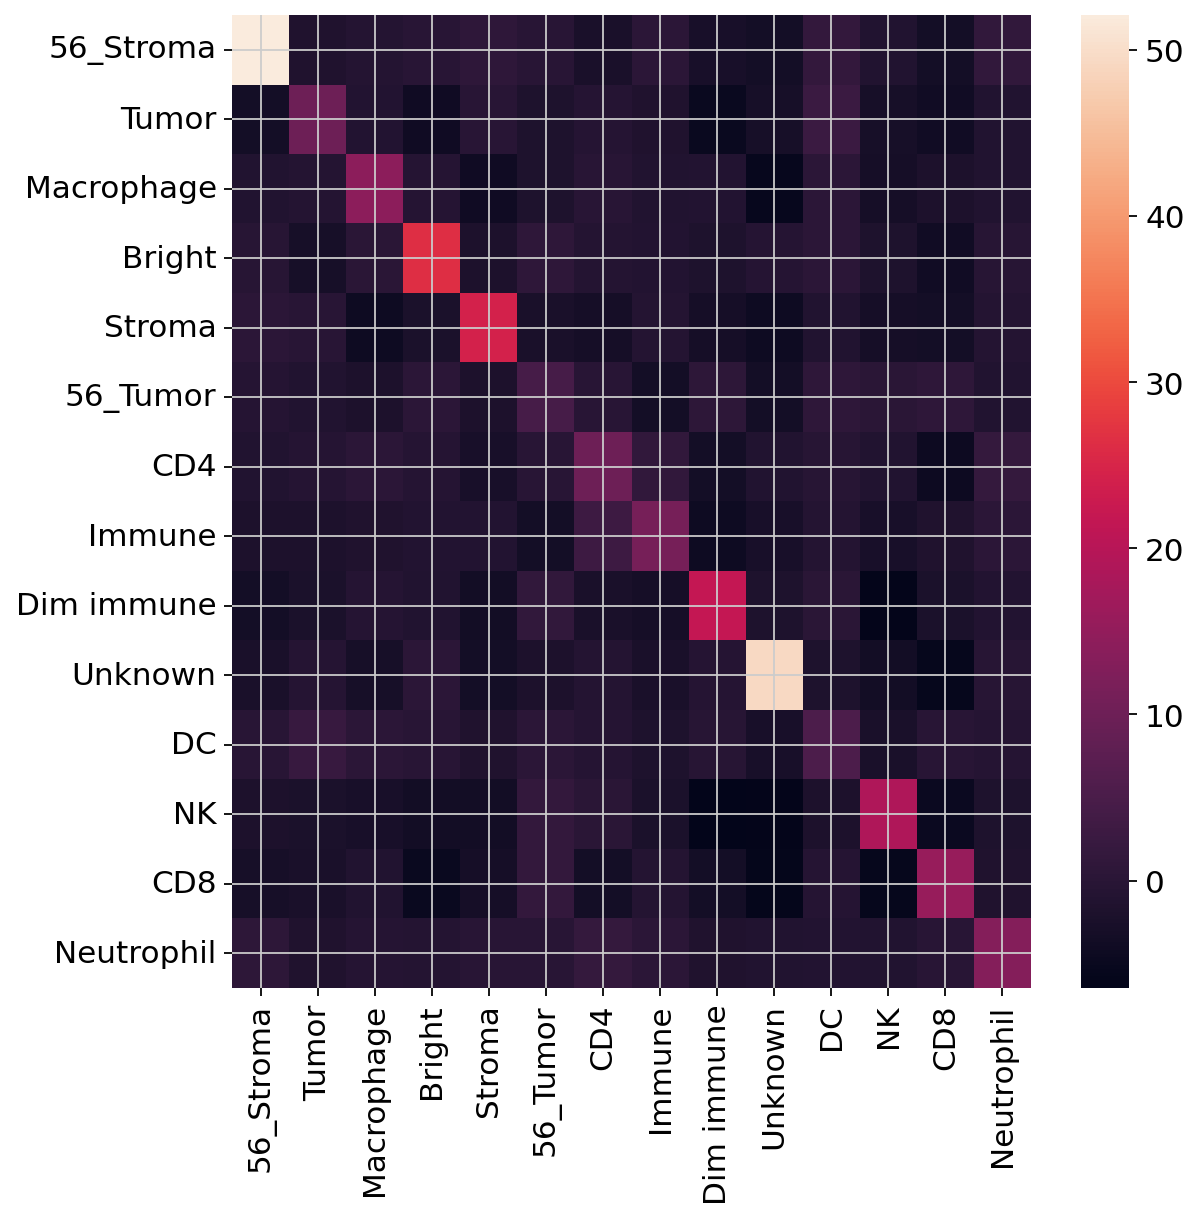

In [18]:


    # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(zscore_df)

In [14]:
#plot_correlation_circle_heatmap_test(zscore_df)

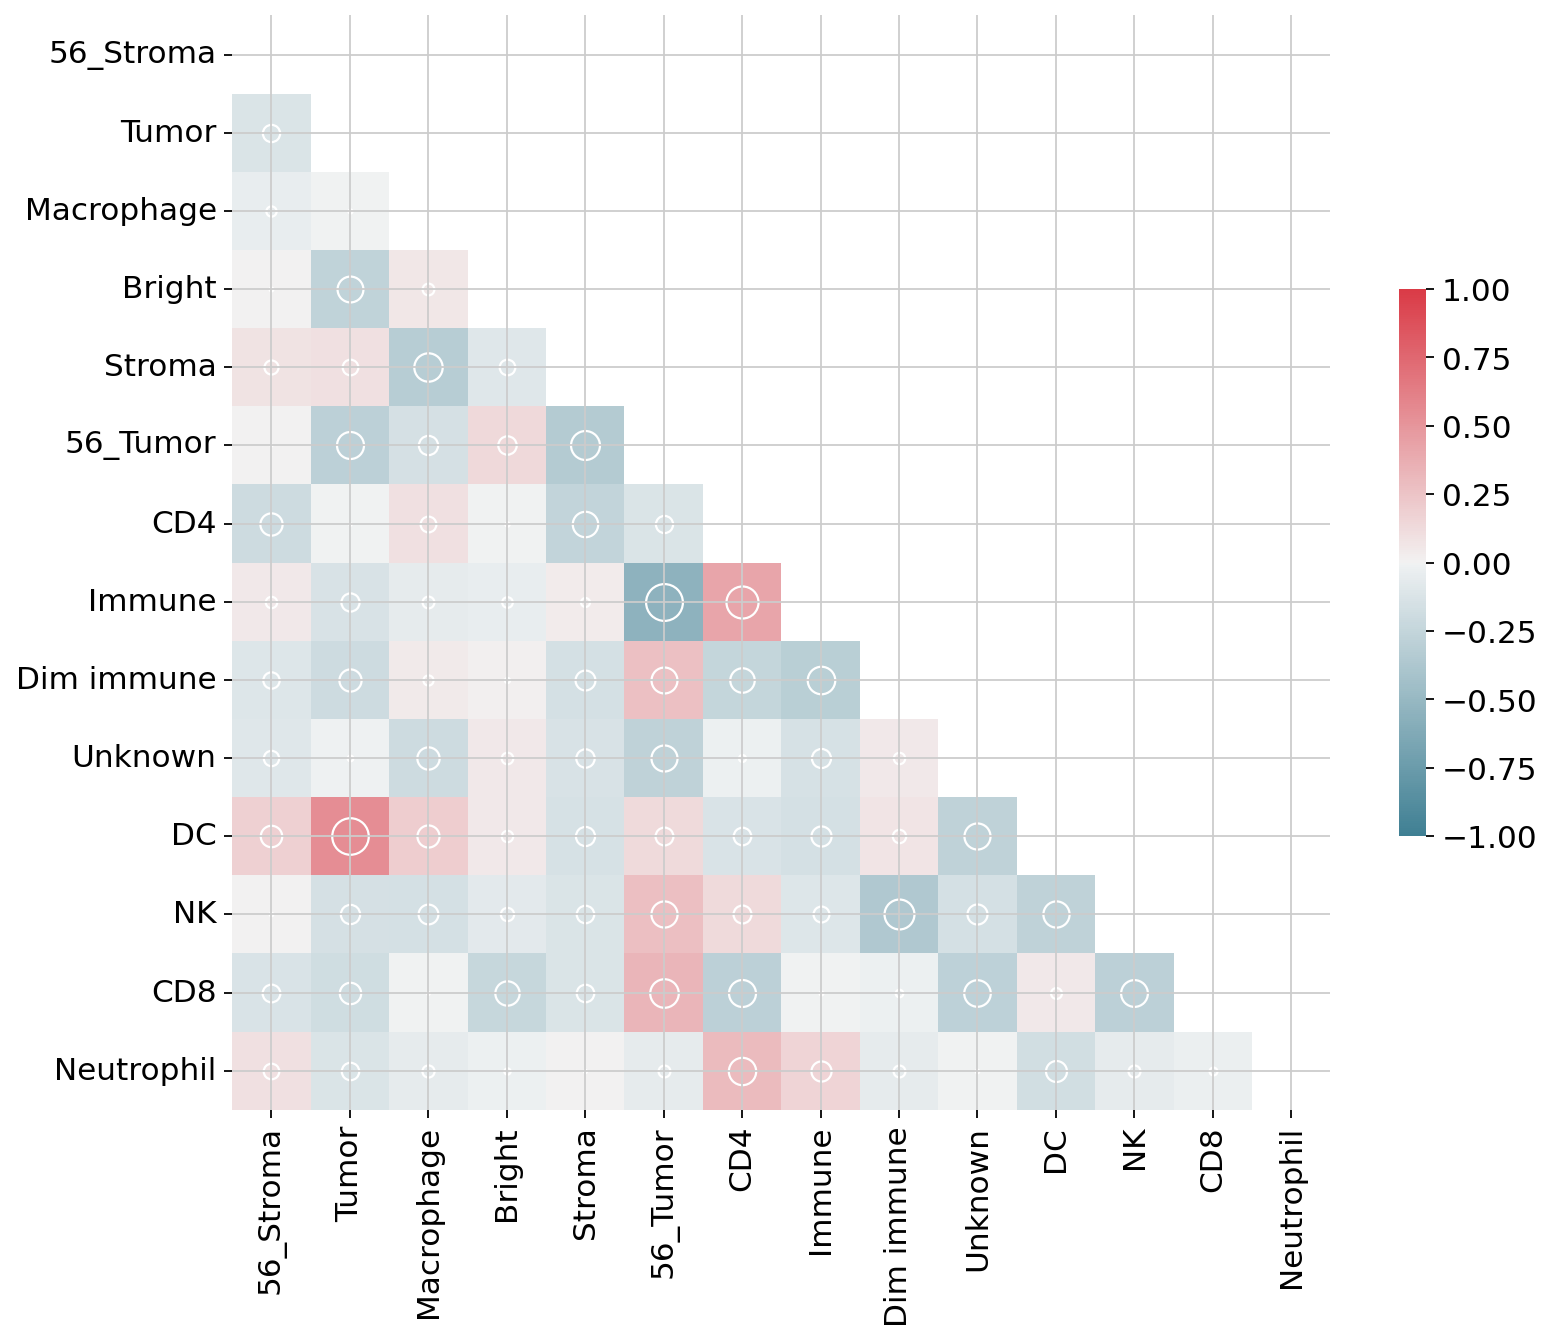

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_circle_heatmap(data, size_scale=500, save_path=None):
    # Compute the correlation matrix
    corr = data.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                square=False, linewidths=.0, cbar_kws={"shrink": .5}, annot=False)

    # Overlay circles on the bottom triangle only
    for i in range(len(corr.columns)):
        for j in range(i):
            size = abs(corr.iloc[i, j]) * size_scale
            color = cmap((corr.iloc[i, j] + 1) / 2)  # Normalize the color value to [0, 1]
            ax.scatter(j + 0.5, i + 0.5, s=size, color=color, edgecolors='w', lw=1)

    # Save the figure if a save path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')

    # Show the plot
    plt.show()

plot_correlation_circle_heatmap(zscore_df) #, save_path = 'enrichment_separate.png')

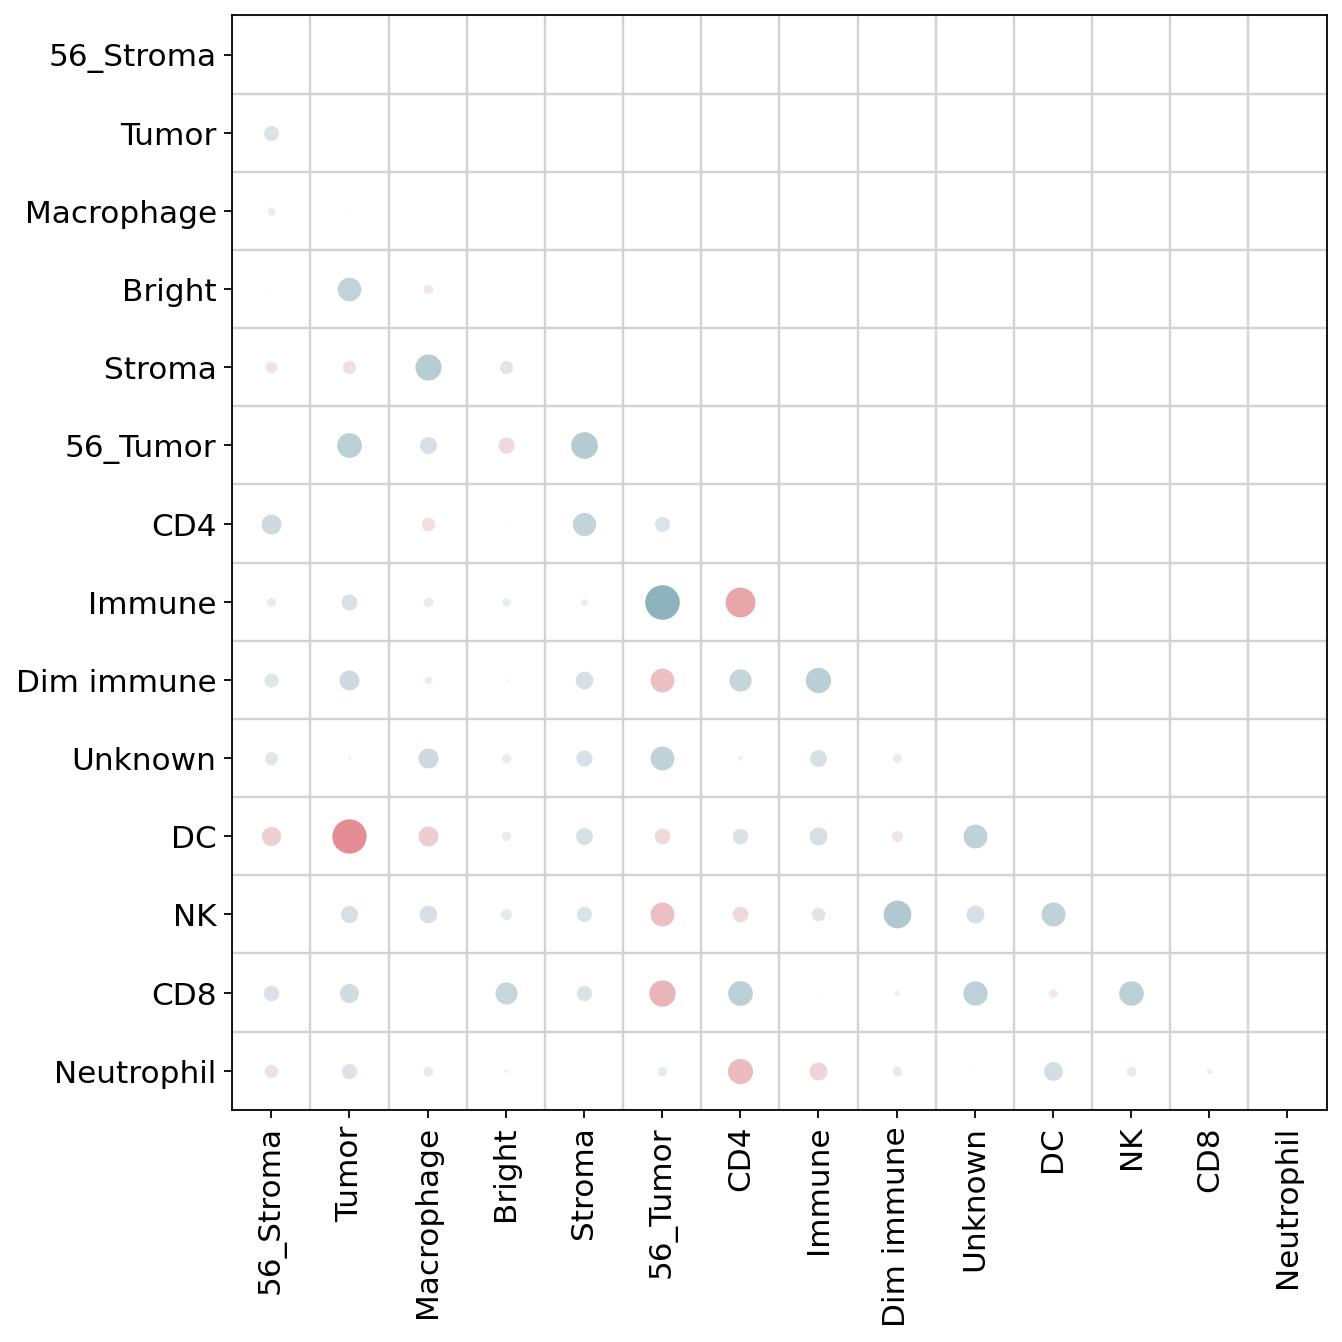

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_circle_heatmap(data, size_scale=500, save_path=None):
    # Compute the correlation matrix
    corr = data.corr()

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    
    # Set up a white background
    ax.set_facecolor('white')

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the grid for the correlation matrix
    for i in range(len(corr.columns)):
        for j in range(len(corr.columns)):
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=None, edgecolor='lightgrey', lw=1))
    
    # Overlay circles on the lower triangle only
    for i in range(len(corr.columns)):
        for j in range(i):
            size = abs(corr.iloc[i, j]) * size_scale
            color = cmap((corr.iloc[i, j] + 1) / 2)  # Normalize the color value to [0, 1]
            ax.scatter(j + 0.5, i + 0.5, s=size, color=color, edgecolors='w', lw=1)
    
    # Set axis labels and ticks
    ax.set_xticks(np.arange(len(corr.columns)) + 0.5)
    ax.set_yticks(np.arange(len(corr.columns)) + 0.5)
    ax.set_xticklabels(corr.columns, rotation=90)
    ax.set_yticklabels(corr.columns)

    # Adjust the limits and the aspect
    ax.set_xlim(0, len(corr.columns))
    ax.set_ylim(len(corr.columns), 0)
    ax.set_aspect('equal')

    # Remove grid lines
    ax.grid(False)

    # Save the figure if a save path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')

    # Show the plot
    plt.show()

# Example usage with a DataFrame called zscore_df
plot_correlation_circle_heatmap(zscore_df)


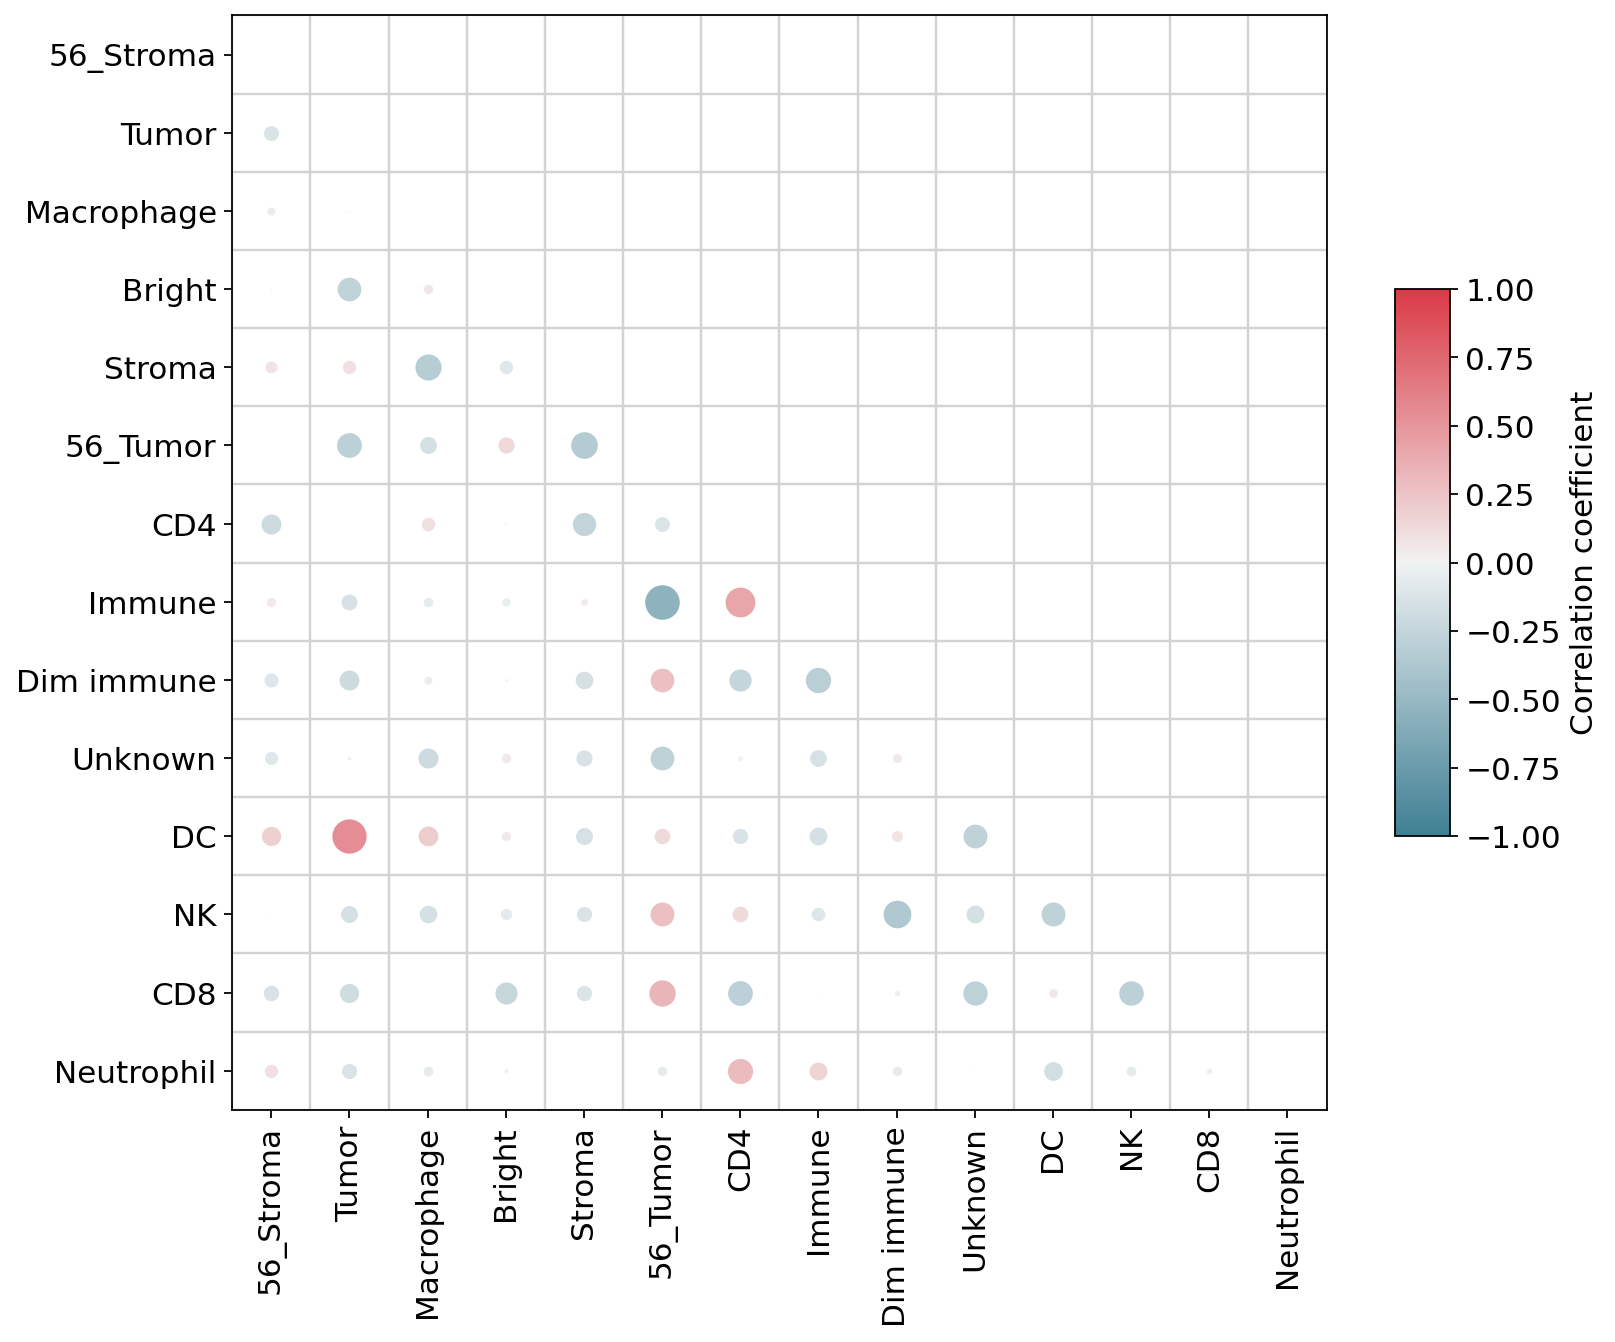

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_circle_heatmap(data, size_scale=500, save_path=None):
    # Compute the correlation matrix
    corr = data.corr()

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    
    # Set up a white background
    ax.set_facecolor('white')

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the grid for the correlation matrix
    for i in range(len(corr.columns)):
        for j in range(len(corr.columns)):
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=None, edgecolor='lightgrey', lw=1))
    
    # Overlay circles on the lower triangle only
    for i in range(len(corr.columns)):
        for j in range(i):
            size = abs(corr.iloc[i, j]) * size_scale
            color = cmap((corr.iloc[i, j] + 1) / 2)  # Normalize the color value to [0, 1]
            ax.scatter(j + 0.5, i + 0.5, s=size, color=color, edgecolors='w', lw=1)
    
    # Set axis labels and ticks
    ax.set_xticks(np.arange(len(corr.columns)) + 0.5)
    ax.set_yticks(np.arange(len(corr.columns)) + 0.5)
    ax.set_xticklabels(corr.columns, rotation=90)
    ax.set_yticklabels(corr.columns)

    # Adjust the limits and the aspect
    ax.set_xlim(0, len(corr.columns))
    ax.set_ylim(len(corr.columns), 0)
    ax.set_aspect('equal')

    # Remove grid lines
    ax.grid(False)
    
    # Add a color bar
    norm = plt.Normalize(vmin=-1, vmax=1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = f.colorbar(sm, ax=ax, orientation='vertical', shrink=0.5, aspect=10)
    cbar.set_label('Correlation coefficient')

    # Save the figure if a save path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')

    # Show the plot
    plt.show()

# Example usage with a DataFrame called zscore_df
plot_correlation_circle_heatmap(zscore_df)


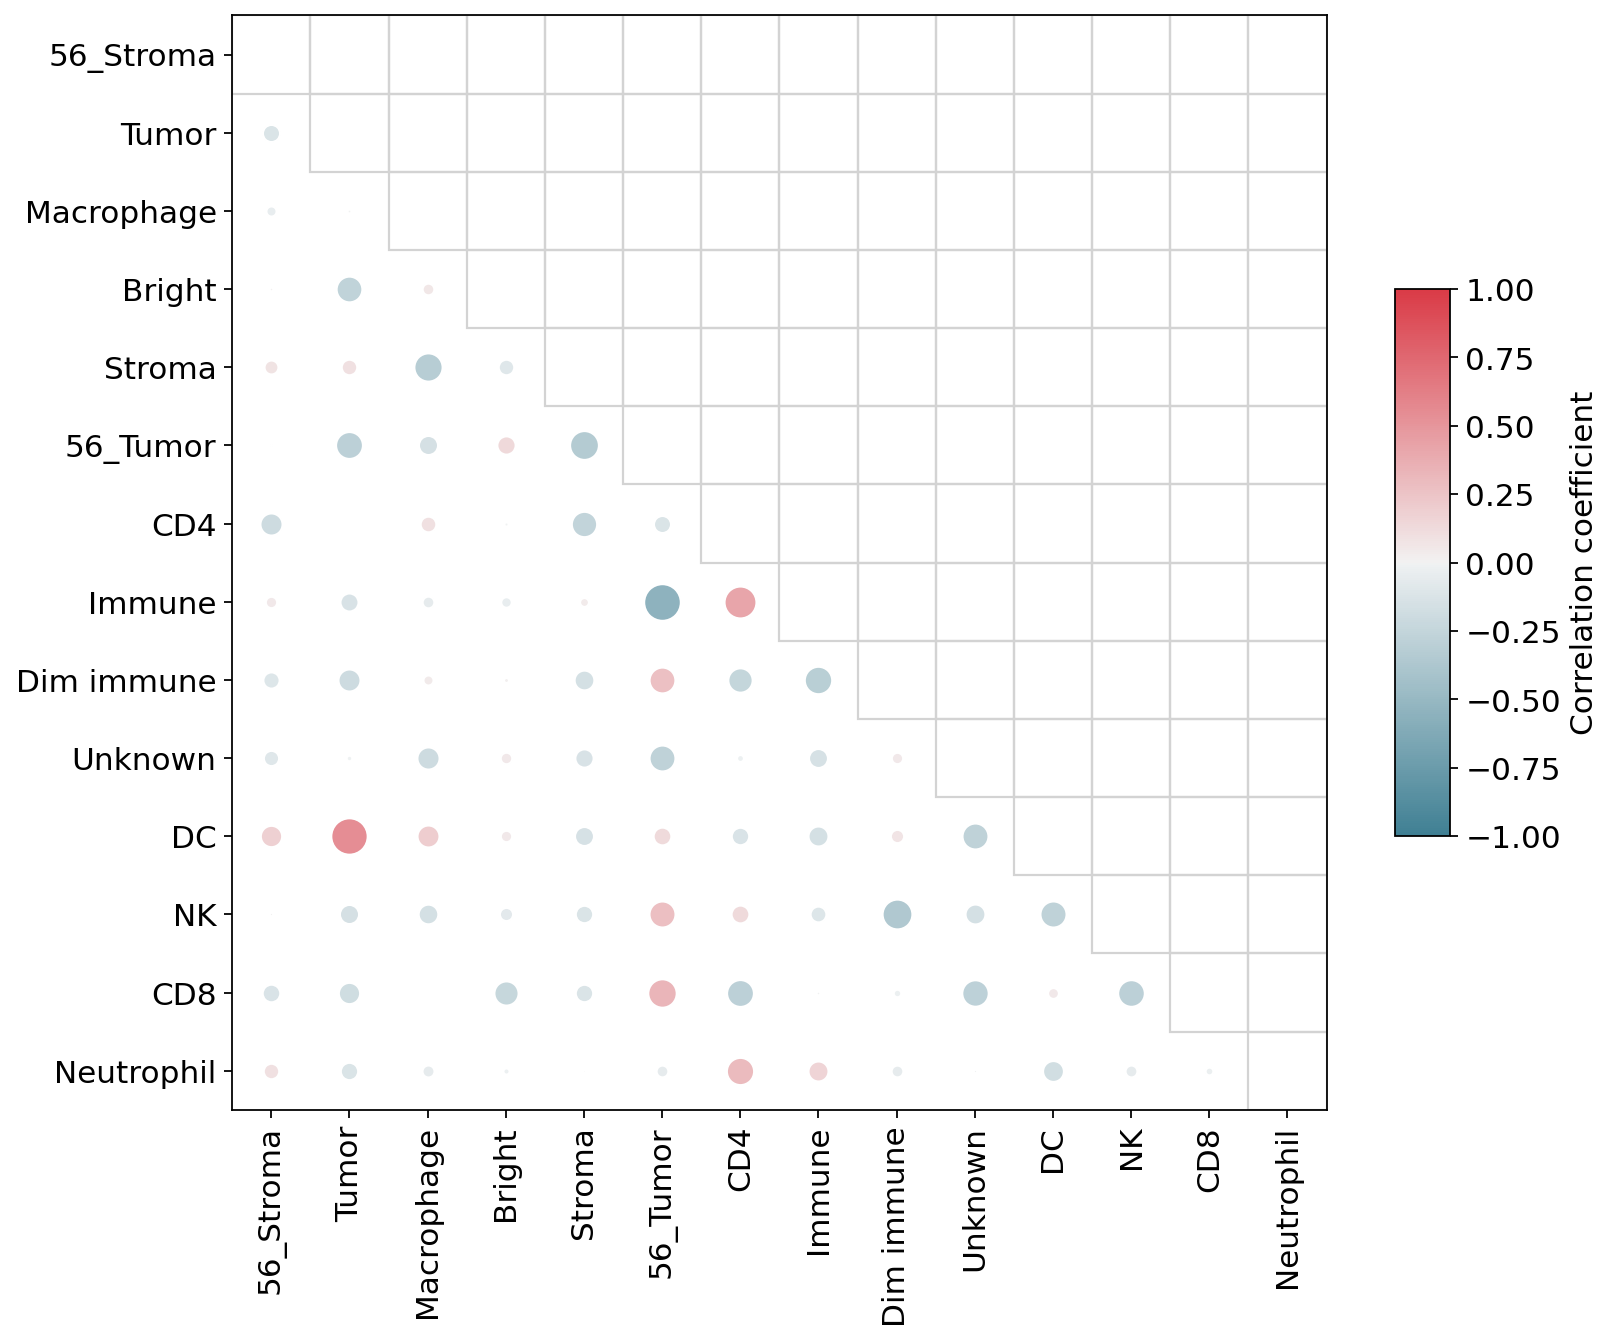

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_circle_heatmap(data, size_scale=500, save_path=None):
    # Compute the correlation matrix
    corr = data.corr()

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    
    # Set up a white background
    ax.set_facecolor('white')

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the grid for the correlation matrix, but only for the upper triangle
    for i in range(len(corr.columns)):
        for j in range(i, len(corr.columns)):
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=None, edgecolor='lightgrey', lw=1))
    
    # Overlay circles on the upper triangle only
    for i in range(len(corr.columns)):
        for j in range(i ):
            size = abs(corr.iloc[i, j]) * size_scale
            color = cmap((corr.iloc[i, j] + 1) / 2)  # Normalize the color value to [0, 1]
            ax.scatter(j + 0.5, i + 0.5, s=size, color=color, edgecolors='w', lw=1)
    
    # Set axis labels and ticks
    ax.set_xticks(np.arange(len(corr.columns)) + 0.5)
    ax.set_yticks(np.arange(len(corr.columns)) + 0.5)
    ax.set_xticklabels(corr.columns, rotation=90)
    ax.set_yticklabels(corr.columns)

    # Adjust the limits and the aspect
    ax.set_xlim(0, len(corr.columns))
    ax.set_ylim(len(corr.columns), 0)
    ax.set_aspect('equal')

    # Remove grid lines
    ax.grid(False)
    
    # Add a color bar
    norm = plt.Normalize(vmin=-1, vmax=1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = f.colorbar(sm, ax=ax, orientation='vertical', shrink=0.5, aspect=10)
    cbar.set_label('Correlation coefficient')

    # Save the figure if a save path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')

    # Show the plot
    plt.show()

# Example usage with a DataFrame called zscore_df


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_circle_heatmap(data, size_scale=500, save_path=None):
    # Compute the correlation matrix
    corr = data.corr()

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    
    # Set up a white background
    ax.set_facecolor('white')

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the grid for the correlation matrix, but only for the lower triangle
    for i in range(len(corr.columns)):
        for j in range(i):
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=None, edgecolor='lightgrey', lw=1))
    
    # Overlay circles on the lower triangle only
    for i in range(len(corr.columns)):
        for j in range(i):
            size = abs(corr.iloc[i, j]) * size_scale
            color = cmap((corr.iloc[i, j] + 1) / 2)  # Normalize the color value to [0, 1]
            ax.scatter(j + 0.5, i + 0.5, s=size, color=color, edgecolors='w', lw=1)
    
    # Set axis labels and ticks
    ax.set_xticks(np.arange(len(corr.columns)) + 0.5)
    ax.set_yticks(np.arange(len(corr.columns)) + 0.5)
    ax.set_xticklabels(corr.columns, rotation=90)
    ax.set_yticklabels(corr.columns)

    # Adjust the limits and the aspect
    ax.set_xlim(0, len(corr.columns))
    ax.set_ylim(len(corr.columns), 0)
    ax.set_aspect('equal')

    # Remove grid lines
    ax.grid(False)
    
    # Add a color bar
    norm = plt.Normalize(vmin=-1, vmax=1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = f.colorbar(sm, ax=ax, orientation='vertical', shrink=0.5, aspect=10)
    cbar.set_label('Correlation coefficient')

    # Save the figure if a save path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')

    # Show the plot
    plt.show()




In [10]:
# Example usage with a DataFrame called zscore_df
plot_correlation_circle_heatmap(zscore_df, save_path ='corr_graph.png')

NameError: name 'zscore_df' is not defined

,56_Stroma,Tumor,Macrophage,Bright,Stroma,56_Tumor,CD4,Immune,Dim immune,Unknown,DC,NK,CD8,Neutrophil
56_Stroma,52.091597,-1.572636,-0.910435,-0.152631,0.828145,-0.182852,-2.438871,0.252448,-2.783664,-3.445239,1.467357,-1.203303,-3.416931,1.185517
Tumor,-3.380395,9.838934,-1.049824,-4.014398,-0.085420,-1.798089,-0.612228,-1.565159,-4.944156,-2.956376,2.618793,-3.003152,-3.767484,-1.282668
Macrophage,-1.396745,-0.842963,14.163970,-0.604890,-4.056807,-1.784374,-0.155400,-1.366857,-1.135251,-5.516041,0.402897,-3.131522,-1.921770,-1.408568
Bright,-0.311518,-2.933341,-0.043502,26.293248,-2.057904,0.859993,-0.830256,-1.178217,-1.680758,-0.639357,0.381329,-1.770606,-3.937523,-0.452275
Stroma,0.378509,-0.241515,-4.282793,-2.223179,24.213605,-2.341428,-3.030142,-0.803266,-3.179680,-4.313856,-1.339181,-3.228276,-3.262339,-0.753462
56_Tumor,-0.614409,-1.243502,-1.911572,0.243887,-1.975756,4.320345,-0.251668,-3.342309,0.619956,-3.453679,0.721592,0.059564,0.851931,-1.252124
CD4,-1.319168,-0.623432,0.228285,-0.523899,-2.761332,-0.095656,9.833292,1.213645,-3.401924,-1.409824,-0.379563,-1.228889,-4.430751,1.774699
Immune,-2.050726,-1.944513,-1.620039,-1.046086,-1.126394,-3.399484,2.969625,11.257741,-4.307209,-2.794630,-0.816305,-2.761853,-1.556566,0.220336
Dim immune,-3.338987,-2.187153,-0.730324,-1.375852,-3.538258,1.297615,-2.495924,-3.203036,21.682639,-1.692259,0.173628,-6.044061,-2.172557,-0.973203
Unknown,-2.365234,-0.695772,-2.946392,0.276685,-3.271693,-2.082685,-0.777837,-2.481504,-0.520788,49.142598,-1.840330,-3.663801,-5.768207,-0.350599


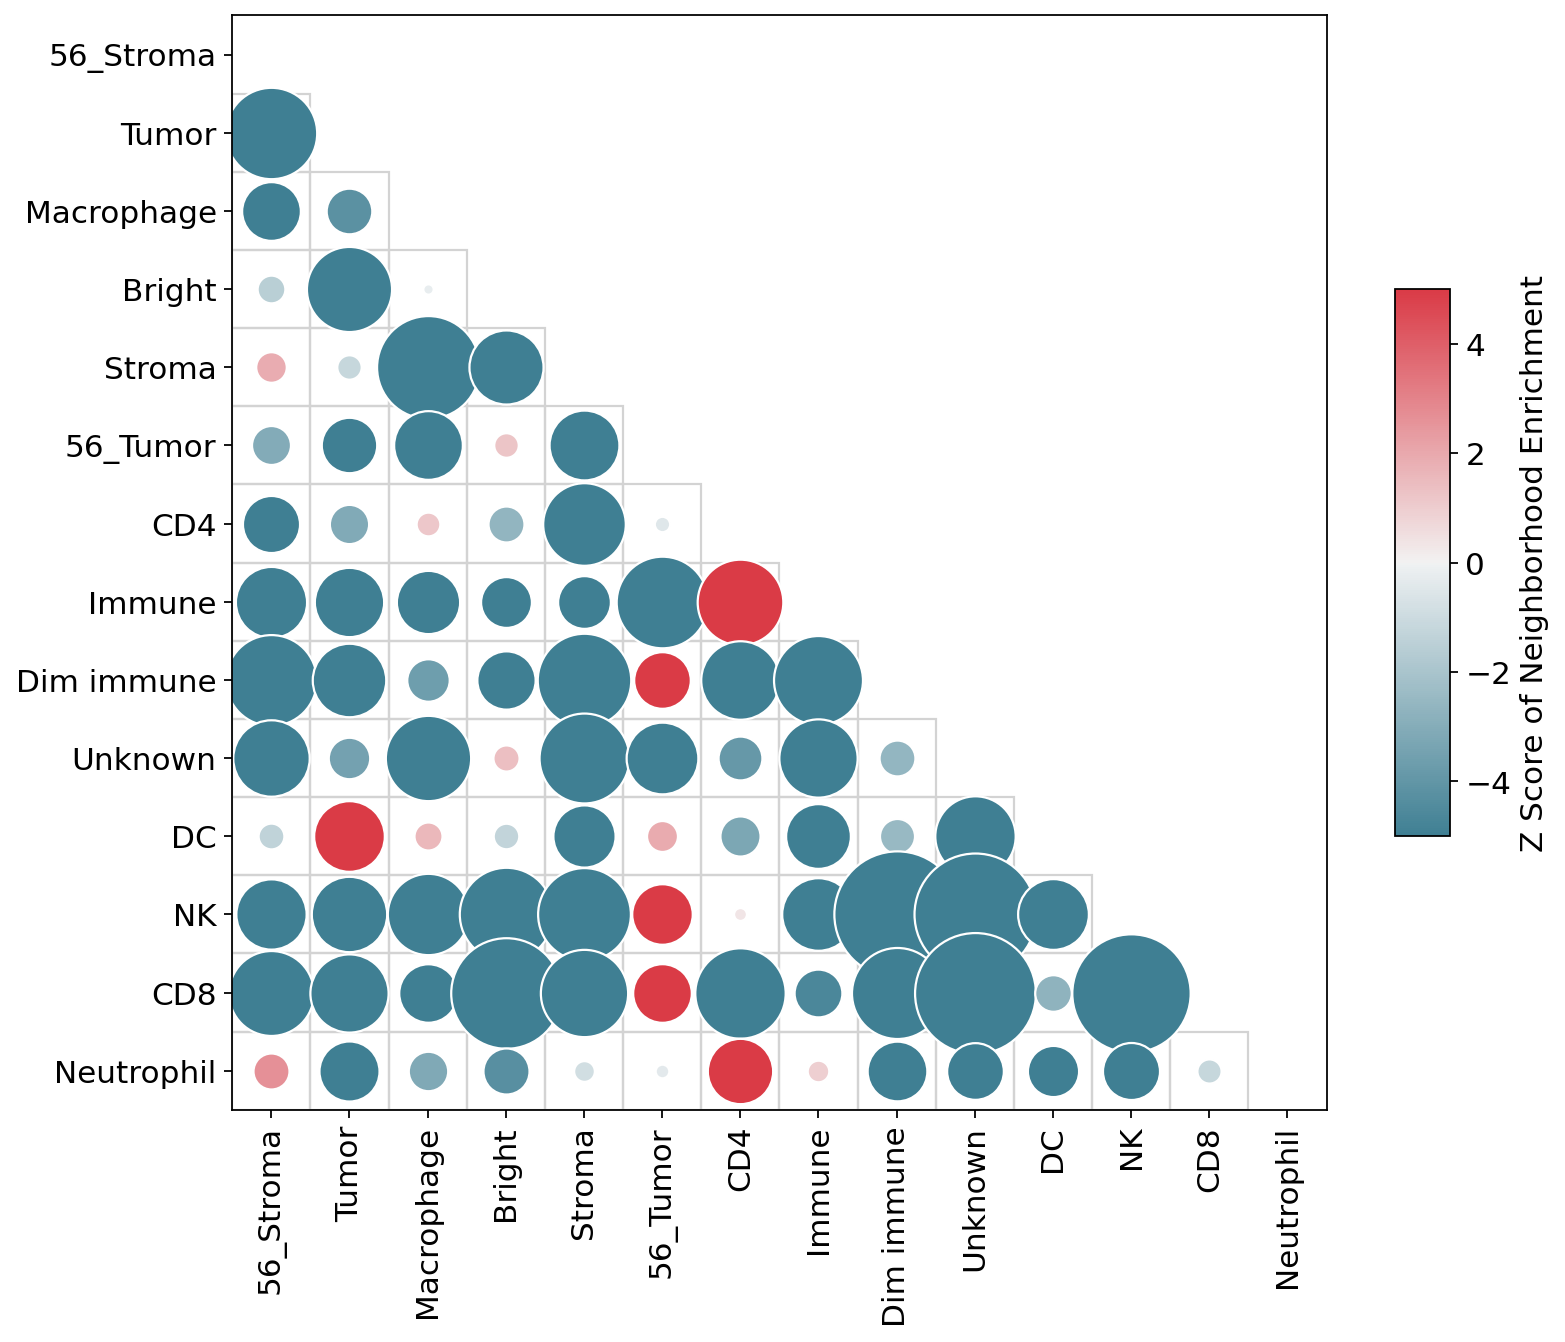

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_circle_heatmap_raw(data, size_scale=500, save_path=None):
    # Compute the correlation matrix
    corr = data

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    
    # Set up a white background
    ax.set_facecolor('white')

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the grid for the correlation matrix, but only for the lower triangle
    for i in range(len(corr.columns)):
        for j in range(i):
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=None, edgecolor='lightgrey', lw=1))
    
    # Overlay circles on the lower triangle only
    for i in range(len(corr.columns)):
        for j in range(i):
            size = abs(corr.iloc[i, j]) * size_scale
            color = cmap((corr.iloc[i, j] + 1) / 2)  # Normalize the color value to [0, 1]
            ax.scatter(j + 0.5, i + 0.5, s=size, color=color, edgecolors='w', lw=1)
    
    # Set axis labels and ticks
    ax.set_xticks(np.arange(len(corr.columns)) + 0.5)
    ax.set_yticks(np.arange(len(corr.columns)) + 0.5)
    ax.set_xticklabels(corr.columns, rotation=90)
    ax.set_yticklabels(corr.columns)

    # Adjust the limits and the aspect
    ax.set_xlim(0, len(corr.columns))
    ax.set_ylim(len(corr.columns), 0)
    ax.set_aspect('equal')

    # Remove grid lines
    ax.grid(False)
    
    # Add a color bar
    norm = plt.Normalize(vmin=-5, vmax=5)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = f.colorbar(sm, ax=ax, orientation='vertical', shrink=0.5, aspect=10)
    cbar.set_label('Z Score of Neighborhood Enrichment')

    # Save the figure if a save path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')

    # Show the plot
    plt.show()


plot_correlation_circle_heatmap_raw(zscore_df)